<a href="https://colab.research.google.com/github/tanmayb104/NLP-with-Disaster-Tweets/blob/main/NLP_Disaster_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

**Read Dataset**

In [3]:
train = pd.read_csv('sample_data/train.csv')
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
test = pd.read_csv('sample_data/test.csv')
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
print(train.shape)
print(test.shape)

(7613, 5)
(3263, 4)


In [6]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [7]:
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

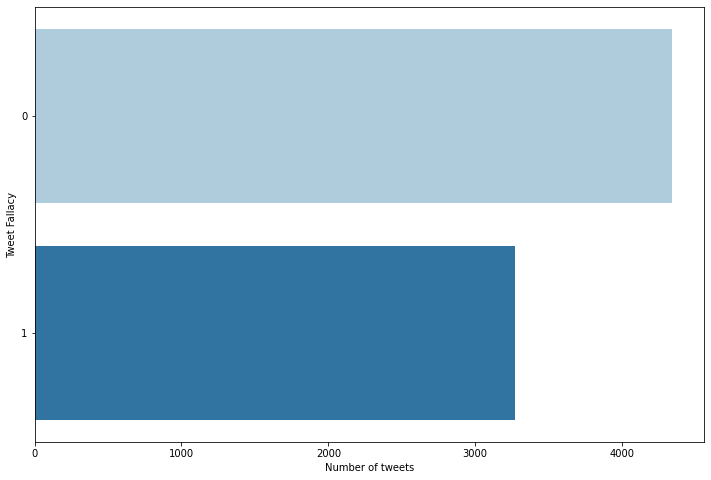

In [11]:
#Visualizing class distribution 
plt.figure(figsize=(12,8))
sns.countplot(y='target',data = train,palette="Paired")
plt.ylabel("Tweet Fallacy")
plt.xlabel("Number of tweets")
plt.show()

**Clean the dataset**

In [ ]:
ps = PorterStemmer()
wordnet = WordNetLemmatizer()

In [ ]:
corpus = []
for i in range(len(train)):
    text = re.sub('[^a-zA-Z]', ' ', train['text'][i])
    text = text.lower()
    text = text.split()
    text = [wordnet.lemmatize(word) for word in text if word not in set(stopwords.words('english'))]
    text = ' '.join(text)
    corpus.append(text)

In [ ]:
corpus1 = []
for i in range(len(test)):
    text1 = re.sub('[^a-zA-Z]', ' ', test['text'][i])
    text1 = text1.lower()
    text1 = text1.split()
    text1 = [wordnet.lemmatize(word) for word in text1 if word not in set(stopwords.words('english'))]
    text1 = ' '.join(text1)
    corpus1.append(text1)

**Bag Of Words**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

y = pd.get_dummies(train['target'])
y = y.iloc[:, 1].values

cv = CountVectorizer(max_features=2500)
test_x = cv.fit_transform(corpus1).toarray()

**Tf-Idf**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

cv = TfidfVectorizer(max_features=2500)
X1 = cv.fit_transform(corpus).toarray()

y1 = pd.get_dummies(train['target'])
y1 = y1.iloc[:, 1].values

cv = TfidfVectorizer(max_features=2500)
test_x1 = cv.fit_transform(corpus1).toarray()

**Confusion matrix and accuracy**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def calculate(y_test,y_pred):
  confusion_m = confusion_matrix(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)
  print(confusion_m)
  print(accuracy)

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

spam_detect_model = MultinomialNB().fit(X1, y1)

y_pred = spam_detect_model.predict(test_x1)
y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=uint8)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

logisticR = LogisticRegression()
logisticR.fit(X1, y1)

y_pred = logisticR.predict(test_x1)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X1, y1)

y_pred = rfc.predict(test_x1)
y_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=uint8)

**Make submission file**

In [ ]:
def convert(y_pred,name):
  data={"id":test["id"].tolist(),"target":y_pred}
  df = pd.DataFrame(data)
  df.to_csv(f"{name}.csv",index=False)

**Word Embeddings**

In [ ]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Bidirectional
from keras.layers.embeddings import Embedding
from tensorflow.keras.layers import LSTM

In [ ]:
a=set()
for i in corpus:
  for j in i.split():
    a.add(j)
for i in corpus1:
  for j in i.split():
    a.add(j)
print(len(a))


26781


In [ ]:
vocab_size = 50000
encoded_docs = [one_hot(d, vocab_size) for d in corpus]
encoded_docs[:10]

[[45255, 44252, 6660, 12690, 26943, 9828, 23763],
 [22189, 21945, 36005, 34904, 9367, 49457, 994],
 [11513, 37692, 43790, 16388, 43700, 38876, 36254, 43790, 16388, 8538, 40773],
 [49412, 633, 30088, 36254, 8538, 43625],
 [29631, 44329, 8523, 47467, 29296, 42143, 30088, 772, 11778],
 [24017,
  8268,
  43625,
  47453,
  34162,
  20769,
  34982,
  43954,
  733,
  21945,
  19549,
  30088],
 [31516,
  559,
  25445,
  27564,
  23239,
  25014,
  47069,
  49907,
  45280,
  15082,
  33807,
  4516],
 [2331, 28681, 13647, 21945, 22682],
 [43472, 36254, 26327, 31466, 10748, 49907],
 [22804, 4332, 8967, 4516]]

In [ ]:
encoded_docs1 = [one_hot(d, vocab_size) for d in corpus1]
encoded_docs1[:10]

[[23819, 15601, 34597, 35598],
 [45533, 6660, 30131, 28437, 3723, 8619, 34749],
 [22189, 21945, 34930, 37832, 41466, 15076, 10748, 49907, 16015, 6291],
 [23301, 7991, 10530, 30088],
 [21448, 26290, 11366, 23216, 25094],
 [41865, 6660],
 [33461, 1362, 17205, 18377, 6794, 28253, 46238, 46238],
 [31216],
 [44180, 33170],
 [45006]]

In [ ]:
# pad documents to a max length
max_length = 0
for i in encoded_docs:
  max_length = max(max_length,len(i))
for i in encoded_docs1:
  max_length = max(max_length,len(i))
print(max_length)

27


In [ ]:
max_length = 30
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='pre')
print(padded_docs)

[[    0     0     0 ... 26943  9828 23763]
 [    0     0     0 ...  9367 49457   994]
 [    0     0     0 ... 16388  8538 40773]
 ...
 [    0     0     0 ... 30646 10877 25959]
 [    0     0     0 ... 18377 33351  9559]
 [    0     0     0 ... 30646 33489 16806]]


In [ ]:
padded_docs1 = pad_sequences(encoded_docs1, maxlen=max_length, padding='pre')
print(padded_docs1)

[[    0     0     0 ... 15601 34597 35598]
 [    0     0     0 ...  3723  8619 34749]
 [    0     0     0 ... 49907 16015  6291]
 ...
 [    0     0     0 ... 49519 30646 26616]
 [    0     0     0 ... 30646 22446 37558]
 [    0     0     0 ... 43472 23864  5816]]


In [ ]:
# define the model
embedding_vector_features = 100
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_features, input_length=max_length))
# model.add(Flatten())
# model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(100)))
# model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 30, 100)           5000000   
                                                                 
 bidirectional_3 (Bidirectio  (None, 200)              160800    
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 1)                 201       
                                                                 
Total params: 5,161,001
Trainable params: 5,161,001
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25)

In [ ]:
# fit the model
# model.fit(padded_docs, y, epochs=2, verbose=1)

model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
179/179 [==============================] - 23s 109ms/step - loss: 0.5405 - accuracy: 0.7264 - val_loss: 0.4671 - val_accuracy: 0.7889
Epoch 2/100
179/179 [==============================] - 19s 104ms/step - loss: 0.2713 - accuracy: 0.8925 - val_loss: 0.5066 - val_accuracy: 0.7852
Epoch 3/100
179/179 [==============================] - 19s 105ms/step - loss: 0.1308 - accuracy: 0.9550 - val_loss: 0.6350 - val_accuracy: 0.7616
Epoch 4/100
179/179 [==============================] - 19s 105ms/step - loss: 0.0697 - accuracy: 0.9781 - val_loss: 0.8417 - val_accuracy: 0.7595
Epoch 5/100
179/179 [==============================] - 19s 104ms/step - loss: 0.0460 - accuracy: 0.9870 - val_loss: 0.8967 - val_accuracy: 0.7526
Epoch 6/100
179/179 [==============================] - 19s 104ms/step - loss: 0.0327 - accuracy: 0.9914 - val_loss: 0.9843 - val_accuracy: 0.7631
Epoch 7/100
179/179 [==============================] - 19s 104ms/step - loss: 0.0277 - accuracy: 0.9923 - val_loss: 0.8577 -

In [ ]:
import numpy
y_pred=model.predict(X_test)
final_y_pred=[]
for i in range(len(y_pred)):
  final_y_pred.append(int(numpy.round(y_pred[i])))
final_y_pred[:10]

[1, 0, 0, 1, 0, 0, 0, 1, 1, 0]

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,final_y_pred)


array([[795, 266],
       [243, 600]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,final_y_pred)

0.7326680672268907

In [ ]:
0.7542016806722689
0.7547268907563025

0.7542016806722689

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,final_y_pred))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77      1088
           1       0.69      0.69      0.69       816

    accuracy                           0.73      1904
   macro avg       0.73      0.73      0.73      1904
weighted avg       0.74      0.73      0.73      1904



In [ ]:
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, y, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 92.959410


In [ ]:
ans = model.predict(padded_docs1)
ans

array([[0.24624029],
       [0.8926535 ],
       [0.9985329 ],
       ...,
       [0.8981863 ],
       [0.6345803 ],
       [0.99012226]], dtype=float32)

In [ ]:
print(min(ans),max(ans))

[4.6148438e-07] [0.99999654]


In [ ]:
import numpy
final=[]
for i in range(len(ans)):
  final.append(int(numpy.round(ans[i])))
final[:10]

[0, 1, 1, 1, 1, 1, 0, 0, 0, 0]

In [ ]:
convert(final,"sub22")